In [1]:
import numpy as np
import pyogrio
import geopandas as gpd
from tqdm import tqdm

geopackage_path = "C:/Users/eleonore.kong/Documents/InSAR/DATA/harmonic_egms_data_v2.gpkg"
# layer = 'grid_500m_filter_01'
grid_to_process = 'data_rga'
output = "C:/Users/eleonore.kong/Documents/InSAR/DATA/"

In [2]:
gdf = pyogrio.read_dataframe(geopackage_path, layer=grid_to_process)
# columns_to_keep = [column for column in gdf.columns if "p75" not in column]
# gdf = gdf[columns_to_keep]
gdf

,index,Detrended Amplitude,Detrended Phase Angle (theta),Detrended RMS Error,Detrended Seasonal Risk Score,Detrended First Peak Datetime,Detrended First Trough Datetime,Detrended Amplitude_2016,Detrended Phase Angle (theta)_2016,Detrended RMS Error_2016,...,First_peak_month,First_trough_month,peak_trough_gap,Max_winter,Min_winter,Max_summer,Min_summer,Mean_winter,Mean_summer,geometry
0,0,0.267081,-0.016453,3.949105,0.267045,2016-01-05,2016-07-03,0.271416,0.602216,1.476849,...,1,7,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (382075.543 6946575.414)
1,6,0.258495,0.957270,3.687623,0.160461,2016-02-28,2016-08-26,0.842207,-0.033668,1.260873,...,2,8,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (381541.060 6952041.189)
2,7,0.079646,1.282596,5.537153,0.032839,2016-03-17,2016-09-13,0.289328,2.820671,2.435612,...,3,9,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (381531.337 6952140.569)
3,8,0.528052,0.967610,5.095091,0.324268,2016-02-28,2016-08-26,0.054154,3.082200,1.365558,...,2,8,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (381472.997 6952736.846)
4,12,0.631319,0.948538,5.896157,0.395440,2016-02-28,2016-08-26,0.819552,0.447084,2.393283,...,2,8,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (381093.641 6956612.699)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988329,81678,0.066475,1.525029,4.568682,0.018174,2016-03-29,2016-10-01,0.377534,1.704873,1.911442,...,3,10,7,0.561084,-4.896504,0.036138,-5.361930,-2.145141,-2.684297,POINT (1047039.536 6808400.439)
2988330,81679,0.715407,0.083936,4.352857,0.712890,2016-01-05,2016-07-09,0.956754,0.520433,2.490242,...,1,7,6,0.561084,-4.896504,0.036138,-5.361930,-2.145141,-2.684297,POINT (1047021.581 6808599.609)
2988331,81680,0.301533,0.191532,7.017666,0.296045,2016-01-11,2016-07-15,0.643315,-1.103690,3.345367,...,1,7,6,0.561084,-4.896504,0.036138,-5.361930,-2.145141,-2.684297,POINT (1047012.603 6808699.194)
2988332,81808,0.589094,0.854826,4.082498,0.404044,2016-02-22,2016-08-20,0.333209,0.107602,3.228203,...,2,8,6,0.561084,-4.896504,0.036138,-5.361930,-2.145141,-2.684297,POINT (1047094.154 6808907.416)


In [3]:
argiles = pyogrio.read_dataframe("C:/Users/eleonore.kong/Documents/InSAR/ARGILES/Risk_ARG.gpkg", layer = 'ExpoArgile_Fxx_L93')
argiles.drop(['DPT','ALEA'], axis=1, inplace=True)

In [4]:
swi = pyogrio.read_dataframe("C:/Users/eleonore.kong/Documents/InSAR/SWI/SWI_Package_1969-2023.gpkg", layer = 'swi_data_agg')

In [5]:
gdf_arg_join = gdf.sjoin(argiles, how='left')
gdf_arg_join

,index,Detrended Amplitude,Detrended Phase Angle (theta),Detrended RMS Error,Detrended Seasonal Risk Score,Detrended First Peak Datetime,Detrended First Trough Datetime,Detrended Amplitude_2016,Detrended Phase Angle (theta)_2016,Detrended RMS Error_2016,...,peak_trough_gap,Max_winter,Min_winter,Max_summer,Min_summer,Mean_winter,Mean_summer,geometry,index_right,NIVEAU
0,0,0.267081,-0.016453,3.949105,0.267045,2016-01-05,2016-07-03,0.271416,0.602216,1.476849,...,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (382075.543 6946575.414),32786.0,1.0
1,6,0.258495,0.957270,3.687623,0.160461,2016-02-28,2016-08-26,0.842207,-0.033668,1.260873,...,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (381541.060 6952041.189),32786.0,1.0
2,7,0.079646,1.282596,5.537153,0.032839,2016-03-17,2016-09-13,0.289328,2.820671,2.435612,...,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (381531.337 6952140.569),32786.0,1.0
3,8,0.528052,0.967610,5.095091,0.324268,2016-02-28,2016-08-26,0.054154,3.082200,1.365558,...,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (381472.997 6952736.846),32786.0,1.0
4,12,0.631319,0.948538,5.896157,0.395440,2016-02-28,2016-08-26,0.819552,0.447084,2.393283,...,6,-0.635853,-8.012588,-1.235833,-8.855833,-4.257346,-5.074329,POINT (381093.641 6956612.699),32786.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988329,81678,0.066475,1.525029,4.568682,0.018174,2016-03-29,2016-10-01,0.377534,1.704873,1.911442,...,7,0.561084,-4.896504,0.036138,-5.361930,-2.145141,-2.684297,POINT (1047039.536 6808400.439),5107.0,1.0
2988330,81679,0.715407,0.083936,4.352857,0.712890,2016-01-05,2016-07-09,0.956754,0.520433,2.490242,...,6,0.561084,-4.896504,0.036138,-5.361930,-2.145141,-2.684297,POINT (1047021.581 6808599.609),5107.0,1.0
2988331,81680,0.301533,0.191532,7.017666,0.296045,2016-01-11,2016-07-15,0.643315,-1.103690,3.345367,...,6,0.561084,-4.896504,0.036138,-5.361930,-2.145141,-2.684297,POINT (1047012.603 6808699.194),5107.0,1.0
2988332,81808,0.589094,0.854826,4.082498,0.404044,2016-02-22,2016-08-20,0.333209,0.107602,3.228203,...,6,0.561084,-4.896504,0.036138,-5.361930,-2.145141,-2.684297,POINT (1047094.154 6808907.416),5107.0,1.0


In [6]:
# gdf_arg_join = gdf_arg_join.groupby('grid_500m').mean(numeric_only=True)
gdf_arg_join.drop('index_right', axis=1, inplace=True)
gdf_arg_join['NIVEAU'] = gdf_arg_join['NIVEAU'].fillna(0)
# gdf_arg_join = gdf_arg_join.merge(gdf[['grid_500m','geometry']], how='left', on='grid_500m')
gdf_arg_join = gpd.GeoDataFrame(gdf_arg_join, crs=2154)
gdf_arg_swi_join = gdf_arg_join.sjoin(swi, how='left')
gdf_arg_swi_join.drop('index_right', axis=1, inplace=True)
gdf_arg_swi_join

,index,Detrended Amplitude,Detrended Phase Angle (theta),Detrended RMS Error,Detrended Seasonal Risk Score,Detrended First Peak Datetime,Detrended First Trough Datetime,Detrended Amplitude_2016,Detrended Phase Angle (theta)_2016,Detrended RMS Error_2016,...,summer_mean_swi_2019,summer_mean_swi_2020,summer_mean_swi_2021,winter_summer_swi_diff,winter_summer_swi_diff_2016,winter_summer_swi_diff_2017,winter_summer_swi_diff_2018,winter_summer_swi_diff_2019,winter_summer_swi_diff_2020,winter_summer_swi_diff_2021
0,0,0.267081,-0.016453,3.949105,0.267045,2016-01-05,2016-07-03,0.271416,0.602216,1.476849,...,0.810333,0.905750,0.850167,0.518671,0.273550,0.052367,0.299583,0.079667,0.316650,0.365433
1,6,0.258495,0.957270,3.687623,0.160461,2016-02-28,2016-08-26,0.842207,-0.033668,1.260873,...,0.810333,0.905750,0.850167,0.518671,0.273550,0.052367,0.299583,0.079667,0.316650,0.365433
2,7,0.079646,1.282596,5.537153,0.032839,2016-03-17,2016-09-13,0.289328,2.820671,2.435612,...,0.810333,0.905750,0.850167,0.518671,0.273550,0.052367,0.299583,0.079667,0.316650,0.365433
3,8,0.528052,0.967610,5.095091,0.324268,2016-02-28,2016-08-26,0.054154,3.082200,1.365558,...,0.872167,0.975917,0.944833,0.577486,0.299417,0.012967,0.440900,0.057633,0.353883,0.381967
4,12,0.631319,0.948538,5.896157,0.395440,2016-02-28,2016-08-26,0.819552,0.447084,2.393283,...,0.872167,0.975917,0.944833,0.577486,0.299417,0.012967,0.440900,0.057633,0.353883,0.381967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988329,81678,0.066475,1.525029,4.568682,0.018174,2016-03-29,2016-10-01,0.377534,1.704873,1.911442,...,0.513667,0.560083,0.689667,0.203600,0.061733,0.106633,0.125483,0.008733,0.154517,0.004333
2988330,81679,0.715407,0.083936,4.352857,0.712890,2016-01-05,2016-07-09,0.956754,0.520433,2.490242,...,0.513667,0.560083,0.689667,0.203600,0.061733,0.106633,0.125483,0.008733,0.154517,0.004333
2988331,81680,0.301533,0.191532,7.017666,0.296045,2016-01-11,2016-07-15,0.643315,-1.103690,3.345367,...,0.513667,0.560083,0.689667,0.203600,0.061733,0.106633,0.125483,0.008733,0.154517,0.004333
2988332,81808,0.589094,0.854826,4.082498,0.404044,2016-02-22,2016-08-20,0.333209,0.107602,3.228203,...,0.513667,0.560083,0.689667,0.203600,0.061733,0.106633,0.125483,0.008733,0.154517,0.004333


In [7]:
# gdf_arg_swi_join = gdf_arg_swi_join.groupby('grid_500m').mean(numeric_only=True)
# gdf_arg_swi_join = gdf_arg_swi_join.merge(gdf[['grid_500m','geometry']], how='left', on='grid_500m')
gdf_arg_swi_join.dropna(axis=0, how='any', inplace=True)
gdf_enriched = gpd.GeoDataFrame(gdf_arg_swi_join, crs=2154)
pyogrio.write_dataframe(gdf_enriched, geopackage_path, layer = grid_to_process+'_enrichi', driver='GPKG')

In [9]:
# gdf_enriched['NIVEAU'] = np.round(gdf_enriched['NIVEAU'], 0)
# gdf_enriched_filter = gdf_enriched[(gdf_enriched['Phase Angle (theta)_median'] >= -1) & (gdf_enriched['Phase Angle (theta)_median'] <= 1)]
gdf_enriched.groupby('NIVEAU').mean(numeric_only=True)

,index,Detrended Amplitude,Detrended Phase Angle (theta),Detrended RMS Error,Detrended Seasonal Risk Score,Detrended Amplitude_2016,Detrended Phase Angle (theta)_2016,Detrended RMS Error_2016,Detrended Seasonal Risk Score_2016,Detrended Amplitude_2017,...,summer_mean_swi_2019,summer_mean_swi_2020,summer_mean_swi_2021,winter_summer_swi_diff,winter_summer_swi_diff_2016,winter_summer_swi_diff_2017,winter_summer_swi_diff_2018,winter_summer_swi_diff_2019,winter_summer_swi_diff_2020,winter_summer_swi_diff_2021
NIVEAU,,,,,,,,,,,,,,,,,,,,,
0.0,65760.619412,0.420515,0.532519,4.925356,0.332650,0.659430,0.339762,2.162471,0.413050,0.593910,...,0.753421,0.809912,0.776443,0.457859,0.158959,0.164045,0.191584,0.150673,0.310279,0.270799
1.0,69934.137581,0.430413,0.502921,4.827316,0.350050,0.636884,0.381252,2.043048,0.413600,0.579025,...,0.754540,0.790526,0.798191,0.499428,0.177731,0.142830,0.249469,0.123389,0.336041,0.285586
2.0,73027.175059,0.462523,0.540054,4.966869,0.357914,0.673487,0.392851,2.106275,0.428549,0.611233,...,0.694753,0.739869,0.733232,0.472323,0.150680,0.175189,0.196230,0.153370,0.323452,0.272705
3.0,74902.428925,0.506688,0.571547,5.068205,0.374466,0.724902,0.423779,2.176888,0.455781,0.649046,...,0.648526,0.719457,0.676825,0.431553,0.123055,0.157321,0.149740,0.161245,0.300638,0.281926


In [32]:
gdf_enriched.groupby('NIVEAU').quantile(0.75,numeric_only=True)

,grid_500m,Detrended Amplitude_median,Detrended Amplitude_2016_median,Detrended Amplitude_2017_median,Detrended Amplitude_2018_median,Detrended Amplitude_2019_median,Detrended Amplitude_2020_median,Detrended Amplitude_2021_median,Detrended Amplitude_winter_2015_median,Detrended Amplitude_summer_2016_median,...,summer_mean_swi_2019,summer_mean_swi_2020,summer_mean_swi_2021,winter_summer_swi_diff,winter_summer_swi_diff_2016,winter_summer_swi_diff_2017,winter_summer_swi_diff_2018,winter_summer_swi_diff_2019,winter_summer_swi_diff_2020,winter_summer_swi_diff_2021
NIVEAU,,,,,,,,,,,,,,,,,,,,,
0.0,3260648.25,0.502355,0.868956,0.632478,0.671165,0.675447,0.666078,0.682162,0.925363,0.809753,...,0.856167,0.924583,0.903000,0.506379,0.220667,0.251383,0.238217,0.198400,0.359450,0.339017
1.0,3233135.50,0.508397,0.802606,0.605906,0.631528,0.640404,0.626088,0.648883,0.840025,0.755256,...,0.840500,0.892458,0.889500,0.557121,0.234550,0.190067,0.323883,0.144667,0.381000,0.357267
2.0,3321384.50,0.545636,0.816003,0.619366,0.643092,0.664554,0.652687,0.667339,0.838435,0.787149,...,0.758250,0.818250,0.819417,0.498214,0.190867,0.237317,0.234500,0.187675,0.358800,0.327767
3.0,2581153.50,0.625022,0.833756,0.641283,0.675469,0.706473,0.706972,0.704258,0.853158,0.820726,...,0.721083,0.802417,0.734417,0.433507,0.146433,0.172800,0.132283,0.206850,0.336767,0.359017


In [ ]:
gdf_filtered = pyogrio.read_dataframe("C:/Users/eleonore.kong/Documents/InSAR/DATA/grid_pca.gpkg", layer=grid_to_process)


In [44]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (You can use any dataset)
# Example using sklearn's Iris dataset

# Create a DataFrame for easy manipulation
# df = gdf_filtered[[ 'Detrended Amplitude_median',
#                     'Detrended Amplitude_std',
#                     'median_summer_winter_amplitude_diff',
#                     'median_summer_amplitude',
#                     'median_winter_amplitude',
#                     'NIVEAU']]
df = gdf_enriched.drop([grid_to_process, 'geometry'], axis=1)
# df = df.fillna(0)
target = gdf_enriched['NIVEAU'].values

# Step 3: Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Apply PCA
pca = PCA(n_components=5)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(df_scaled)

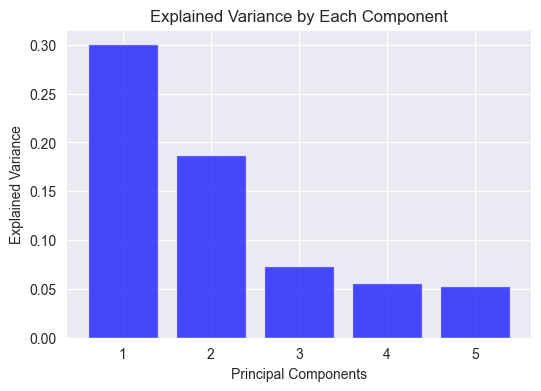

In [45]:
# Step 5: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# pca_df['Target'] = target

# Step 6: Plot the Explained Variance Ratio
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='blue', alpha=0.7)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Each Component')
plt.show()

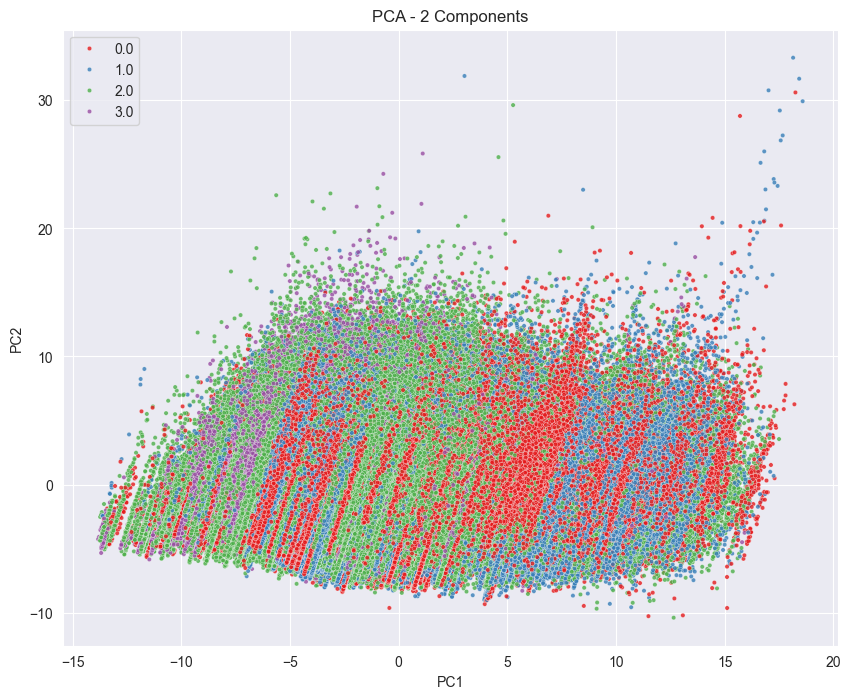

Explained variance ratios: [0.30042464 0.18673552 0.07317454 0.0561759  0.05279139]


In [46]:
# Step 7: Visualize PCA Result
fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(pca_df['PC1'], pca_df['PC3'], pca_df['PC4'],
#                 c=target, cmap='Set1', s=10, alpha=0.8)
sns.scatterplot(x='PC1', y='PC2', hue=target, palette='Set1', data=pca_df, s=10, alpha=0.8) #
# ax.view_init(elev=70, azim=45)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
plt.title('PCA - 2 Components')
# fig.colorbar(sc)
plt.show()

# Step 8: (Optional) Print the Variance Ratios
print("Explained variance ratios:", pca.explained_variance_ratio_)

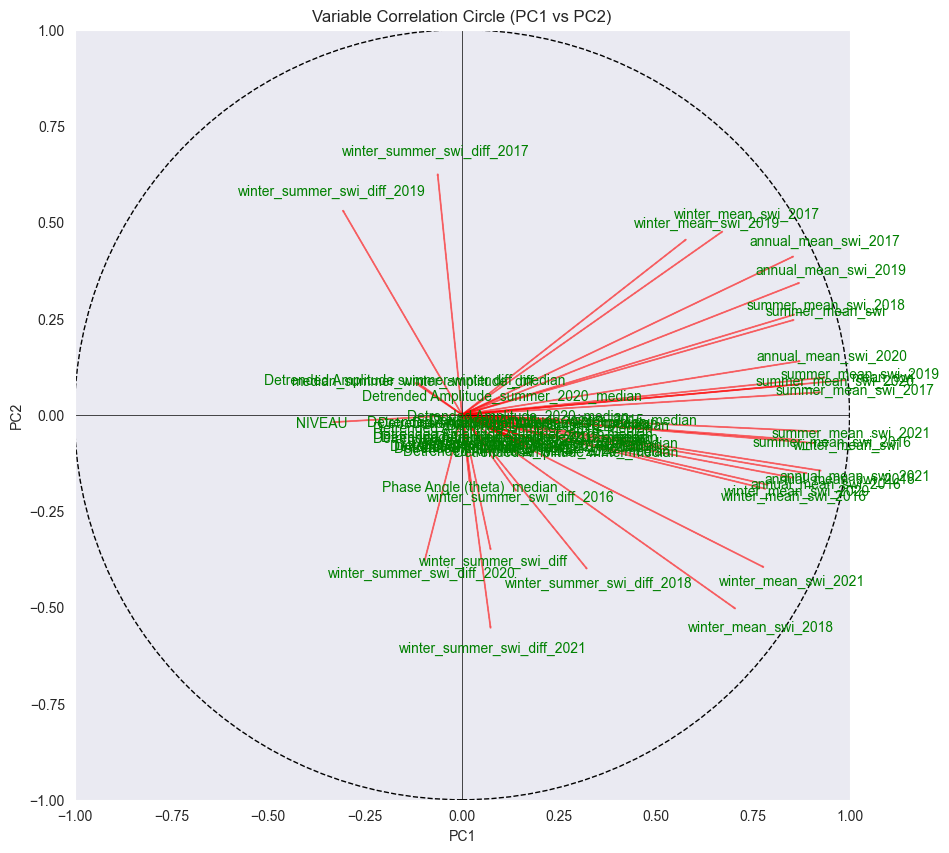

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_scaled is the standardized data, and pca is already fitted
components = pca.components_  # Get PCA components
n_pcs = pca.n_components_  # Number of principal components

# Step 1: Calculate the correlation between original variables and PCs
correlations = components.T * np.sqrt(pca.explained_variance_)

# Step 2: Plot the correlation circle
plt.figure(figsize=(10, 10))

# Plot unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Add each variable as a vector
for i, (var_name, coord) in enumerate(zip(df.columns, correlations)):
    plt.arrow(0, 0, coord[0], coord[3], color='r', alpha=0.5)
    plt.text(coord[0] * 1.1, coord[3] * 1.1, var_name,  color='g', ha='center', va='center')

# Formatting the plot
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Variable Correlation Circle (PC1 vs PC2)')
plt.grid()

plt.show()


In [48]:

# Get the explained variance for scaling
explained_variance = np.sqrt(pca.explained_variance_)

# Calculate the correlation of each variable with PC1
correlations_with_pc1 = components[0, :] * explained_variance[0]
correlations_with_pc2 = components[1, :] * explained_variance[1]
correlations_with_pc3 = components[2, :] * explained_variance[2]
correlations_with_pc4 = components[3, :] * explained_variance[3]
correlations_with_pc5 = components[4, :] * explained_variance[4]

# Create a DataFrame to store the variables and their correlations
correlation_df = pd.DataFrame({
    'Variable': df.columns,
    'Correlation_with_PC1': correlations_with_pc1,
    'Correlation_with_PC2': correlations_with_pc2,
    'Correlation_with_PC3': correlations_with_pc3,
    'Correlation_with_PC4': correlations_with_pc4,
    'Correlation_with_PC5': correlations_with_pc5
    
})

# Sort the DataFrame by the absolute correlation values in descending order
correlation_df['PC1_Abs_Correlation'] = correlation_df['Correlation_with_PC1'].abs()
correlation_df['PC2_Abs_Correlation'] = correlation_df['Correlation_with_PC2'].abs()
correlation_df['PC3_Abs_Correlation'] = correlation_df['Correlation_with_PC3'].abs()
correlation_df['PC4_Abs_Correlation'] = correlation_df['Correlation_with_PC4'].abs()
correlation_df['PC5_Abs_Correlation'] = correlation_df['Correlation_with_PC5'].abs()
# correlation_df_sorted = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display the ranked variables by correlation with PC1
correlation_df

,Variable,Correlation_with_PC1,Correlation_with_PC2,Correlation_with_PC3,Correlation_with_PC4,Correlation_with_PC5,PC1_Abs_Correlation,PC2_Abs_Correlation,PC3_Abs_Correlation,PC4_Abs_Correlation,PC5_Abs_Correlation
0,Detrended Amplitude_median,0.056374,0.484552,0.107658,-0.078628,-0.031540,0.056374,0.484552,0.107658,0.078628,0.031540
1,Detrended Amplitude_2016_median,0.224213,0.669706,0.056429,-0.023724,0.058151,0.224213,0.669706,0.056429,0.023724,0.058151
2,Detrended Amplitude_2017_median,0.166699,0.723346,0.116240,-0.075711,-0.009965,0.166699,0.723346,0.116240,0.075711,0.009965
3,Detrended Amplitude_2018_median,0.198639,0.730602,0.084318,-0.052355,0.023486,0.198639,0.730602,0.084318,0.052355,0.023486
4,Detrended Amplitude_2019_median,0.159445,0.734320,0.102256,-0.070700,0.003134,0.159445,0.734320,0.102256,0.070700,0.003134
5,Detrended Amplitude_2020_median,0.131857,0.739964,0.140491,-0.004450,0.006833,0.131857,0.739964,0.140491,0.004450,0.006833
6,Detrended Amplitude_2021_median,0.170692,0.699844,0.115198,-0.061105,0.010581,0.170692,0.699844,0.115198,0.061105,0.010581
7,Detrended Amplitude_winter_2015_median,0.238443,0.531054,-0.028120,-0.013161,0.254792,0.238443,0.531054,0.028120,0.013161,0.254792
8,Detrended Amplitude_summer_2016_median,0.120093,0.571990,0.130002,-0.032507,-0.200016,0.120093,0.571990,0.130002,0.032507,0.200016
9,Detrended Amplitude_winter_2016_median,0.156277,0.603106,0.017463,-0.073017,0.208882,0.156277,0.603106,0.017463,0.073017,0.208882


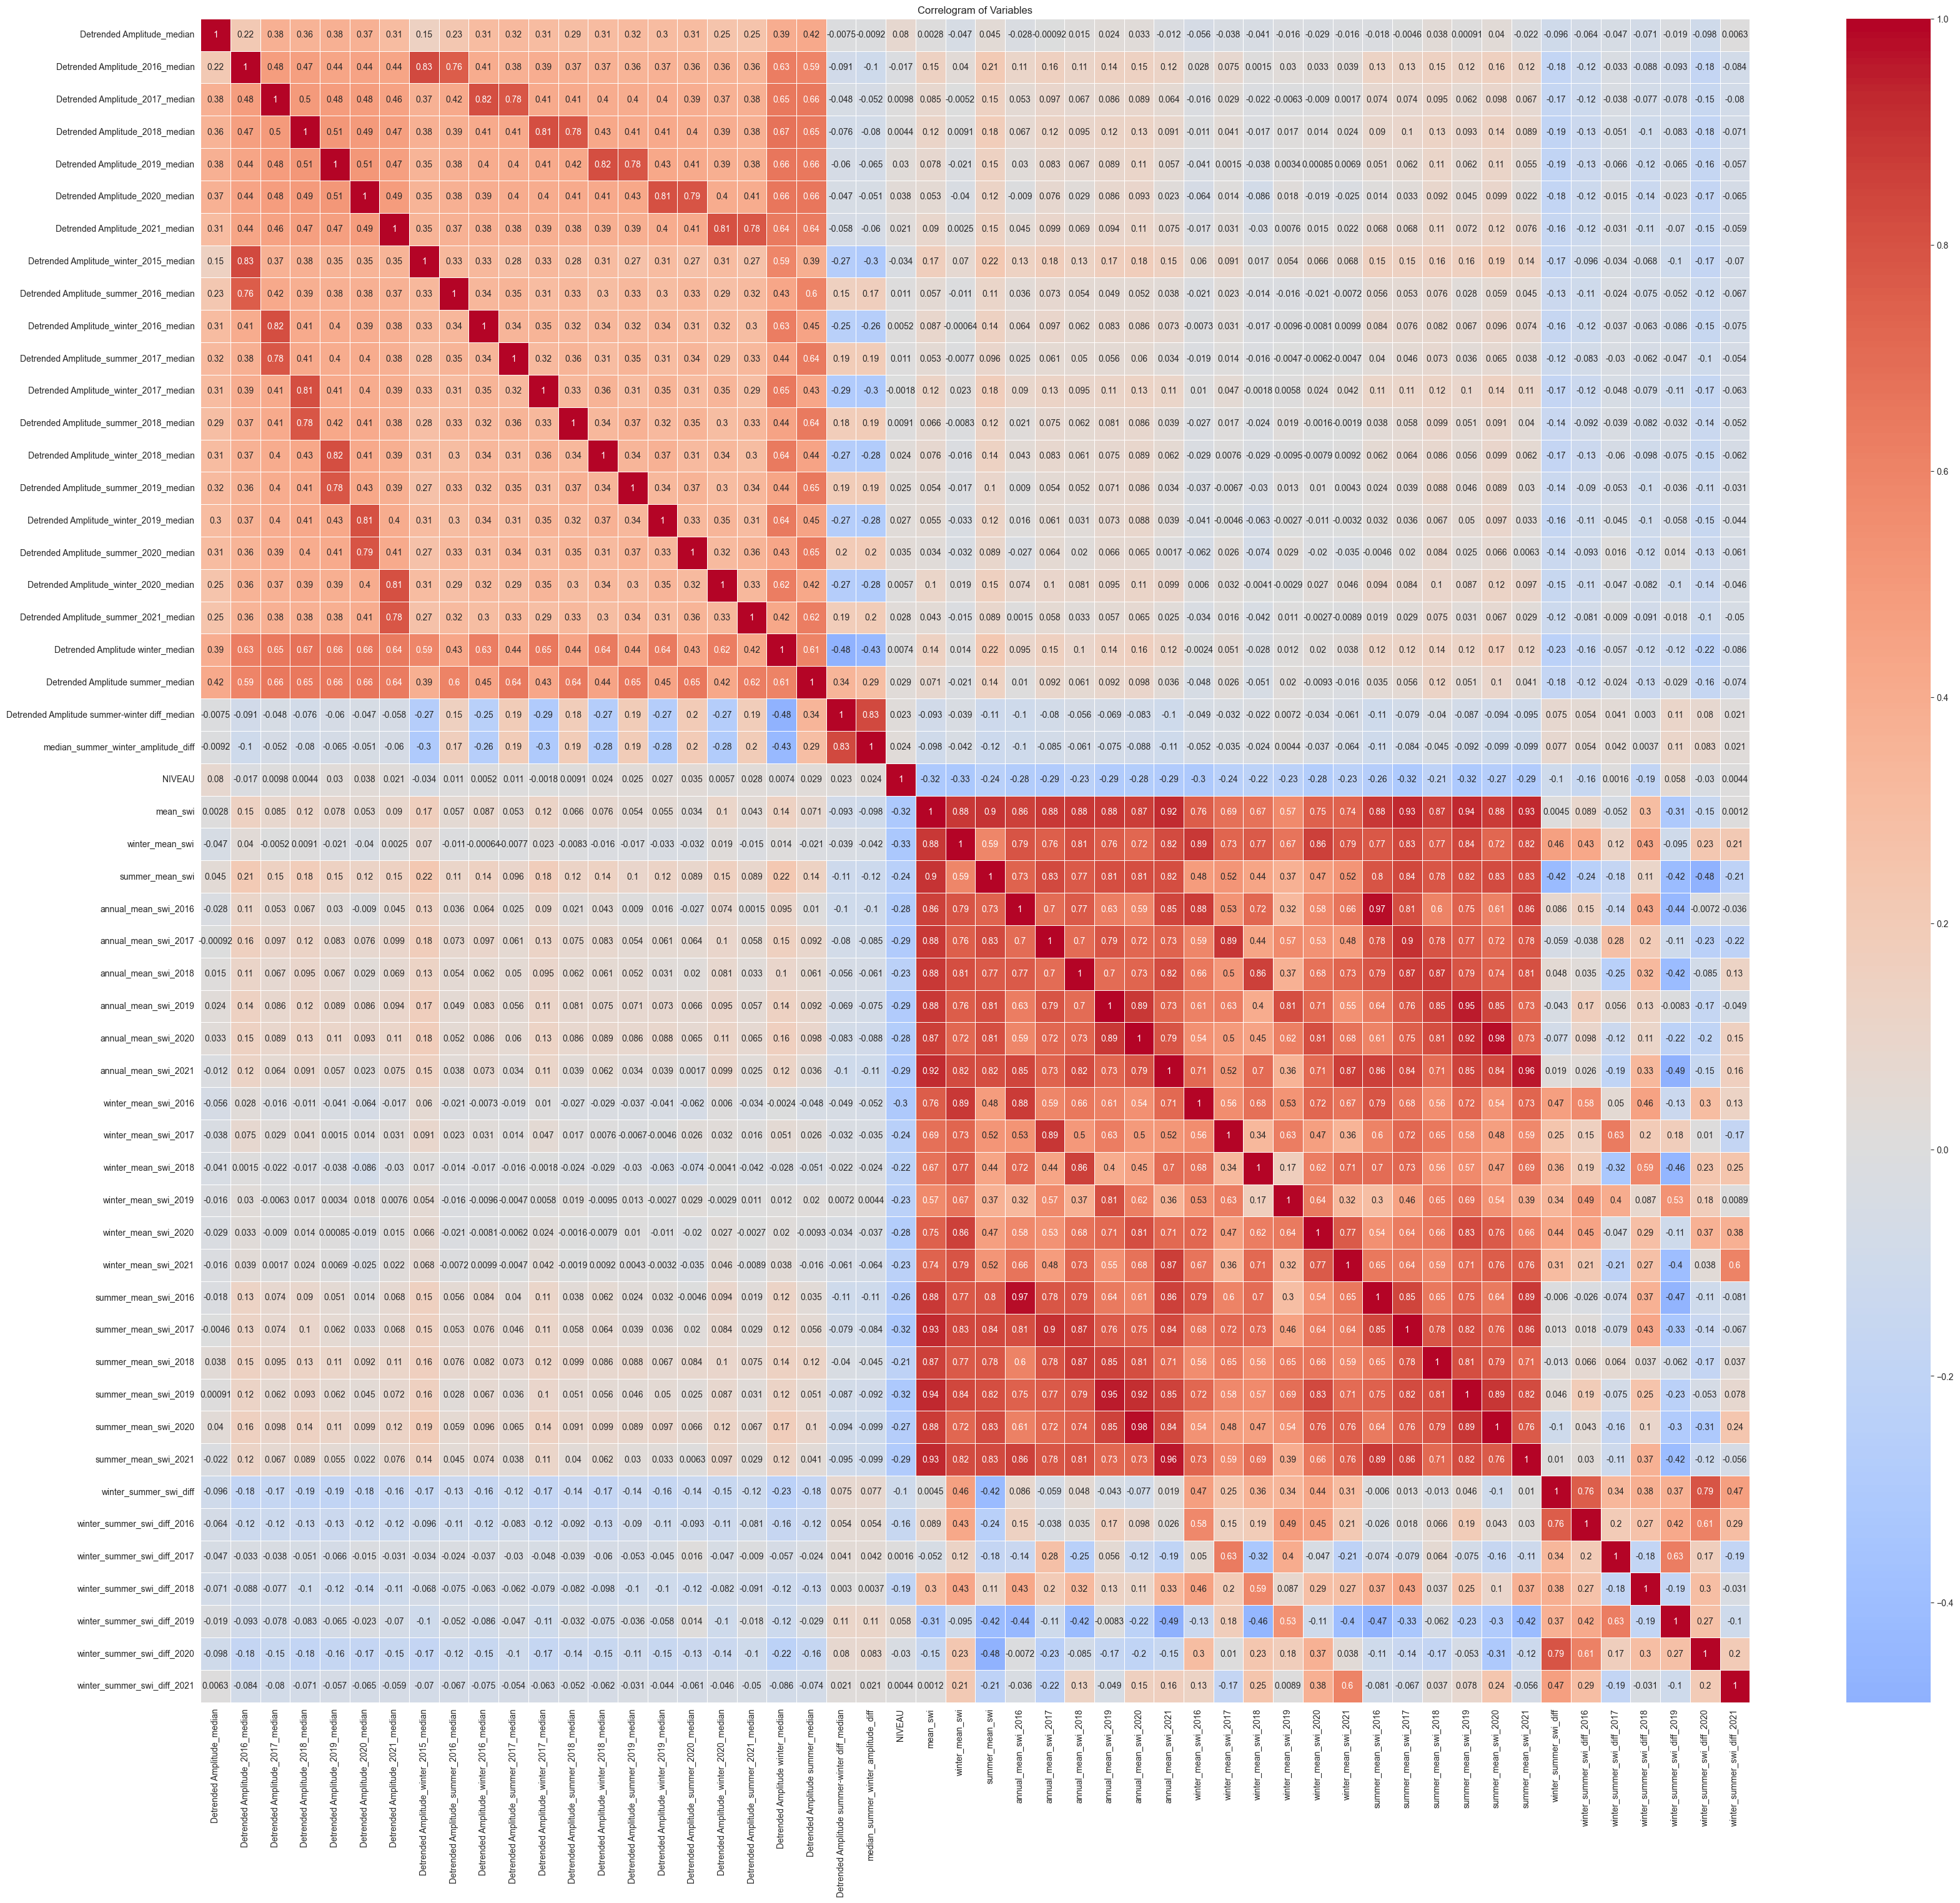

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Calculate the correlation matrix
df = gdf_enriched.drop(['grid_500m','geometry', 'Phase Angle (theta)_median'], axis=1).copy()
corr_matrix = df.corr()

# Step 2: Create a correlogram (heatmap)
plt.figure(figsize=(40, 35))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Step 3: Add plot formatting
plt.title('Correlogram of Variables')
plt.show()